In [1]:
from sklearn.datasets import load_files

uza_train = load_files('.\\uza\\train', encoding='utf-8')
uza_test = load_files('.\\uza\\test', encoding='utf-8')

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocab_size = 50000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words = vocab_size, filters='!"“–”—#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\r\n', oov_token=oov_tok)
tokenizer.fit_on_texts(uza_train.data)
word_index = tokenizer.word_index

dict(list(word_index.items())[0:1000])

{'<OOV>': 1,
 'ва': 2,
 'ўзбекистон': 3,
 'билан': 4,
 'республикаси': 5,
 'учун': 6,
 'бўйича': 7,
 'давлат': 8,
 'йил': 9,
 'ҳам': 10,
 'бу': 11,
 'бир': 12,
 'амалга': 13,
 'ҳамда': 14,
 'ташкил': 15,
 'қилиш': 16,
 'этиш': 17,
 'томонидан': 18,
 '1': 19,
 'шу': 20,
 'вазирлиги': 21,
 'бўлган': 22,
 'модда': 23,
 'ишлаб': 24,
 'ўз': 25,
 'ушбу': 26,
 '№': 27,
 'шунингдек': 28,
 'ошириш': 29,
 'тошкент': 30,
 'халқаро': 31,
 'ривожлантириш': 32,
 'таълим': 33,
 'янги': 34,
 'олий': 35,
 'илмий': 36,
 'жорий': 37,
 'бўлиб': 38,
 'бошқа': 39,
 'ҳар': 40,
 'ахборот': 41,
 'миллий': 42,
 'олиб': 43,
 'тўғрисида': 44,
 '2020': 45,
 'спорт': 46,
 '2019': 47,
 'уларнинг': 48,
 'ёки': 49,
 '2': 50,
 'мазкур': 51,
 '5': 52,
 'сайлов': 53,
 'та': 54,
 'унинг': 55,
 'қабул': 56,
 'йилда': 57,
 'энг': 58,
 'таъминлаш': 59,
 'икки': 60,
 '3': 61,
 'ҳолда': 62,
 'ишлар': 63,
 'президенти': 64,
 'асосида': 65,
 'биринчи': 66,
 'эса': 67,
 'вилояти': 68,
 'жумладан': 69,
 'деб': 70,
 '4': 71,
 'бош'

In [3]:
train_sequences = tokenizer.texts_to_sequences(uza_train.data)


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[6]))
print(len(train_padded[6]))
# s=0
# for i in train_sequences:
#    s=s+len(i)
# print(s/len(train_sequences))

62
200
257
200


In [5]:
print(train_sequences[6])

[26795, 9528, 12481, 26796, 26797, 72, 3117, 2618, 902, 5137, 2, 8573, 10766, 365, 319, 170, 658, 4896, 105, 657, 667, 3024, 3119, 26798, 658, 18791, 14941, 34, 72, 3355, 3361, 342, 290, 14942, 26799, 549, 3505, 4239, 116, 526, 26800, 3509, 2383, 2068, 9528, 12481, 14943, 9529, 319, 3124, 1603, 9, 265, 4897, 133, 1551, 198, 1362, 26801, 4447, 9528, 14944, 5137, 14945, 1282, 1051, 770, 695, 84, 10, 558, 25, 842, 1064, 18792, 4240, 2773, 14, 8587, 1064, 3507, 1245, 4664, 3510, 7817, 7818, 70, 3362, 273, 4447, 9528, 14944, 5137, 14945, 1282, 1051, 770, 695, 84, 10, 558, 25, 842, 1064, 18792, 4240, 2773, 14, 8587, 1064, 3507, 1245, 4664, 3510, 7817, 7818, 70, 3362, 26802, 26803, 2486, 310, 145, 792, 2, 12482, 18, 118, 2937, 43, 1665, 18793, 18794, 5454, 14944, 2269, 2487, 7819, 156, 1299, 219, 4063, 643, 3025, 4241, 99, 1249, 1856, 14946, 1177, 57, 26804, 78, 8588, 14947, 3635, 1857, 12483, 578, 251, 26805, 26806, 26807, 116, 26808, 114, 10779, 12, 733, 5446, 902, 5137, 549, 26809, 75, 268

In [6]:
print(train_padded[6])

[26795  9528 12481 26796 26797    72  3117  2618   902  5137     2  8573
 10766   365   319   170   658  4896   105   657   667  3024  3119 26798
   658 18791 14941    34    72  3355  3361   342   290 14942 26799   549
  3505  4239   116   526 26800  3509  2383  2068  9528 12481 14943  9529
   319  3124  1603     9   265  4897   133  1551   198  1362 26801  4447
  9528 14944  5137 14945  1282  1051   770   695    84    10   558    25
   842  1064 18792  4240  2773    14  8587  1064  3507  1245  4664  3510
  7817  7818    70  3362   273  4447  9528 14944  5137 14945  1282  1051
   770   695    84    10   558    25   842  1064 18792  4240  2773    14
  8587  1064  3507  1245  4664  3510  7817  7818    70  3362 26802 26803
  2486   310   145   792     2 12482    18   118  2937    43  1665 18793
 18794  5454 14944  2269  2487  7819   156  1299   219  4063   643  3025
  4241    99  1249  1856 14946  1177    57 26804    78  8588 14947  3635
  1857 12483   578   251 26805 26806 26807   116 26

In [7]:
test_sequences = tokenizer.texts_to_sequences(uza_test.data)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(test_sequences))
print(test_padded.shape)

462
(462, 200)


In [8]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_article(train_padded[1]))
print('---')
print(uza_train.data[1])

ўзбекистонда i чоракда 1 5 миллионга яқин сайёҳ ташриф буюрди видео статистик маълумотларга кўра жорий йилнинг биринчи чорагида мамлакатимизга 1 5 миллионга яқин сайёҳ ташриф буюрди бу кўрсаткич эса ўтган йилнинг шу даврига нисбатан қарийб 142 фоизга ўсди бу ҳали ҳаммаси эмас туризм соҳасини янада ривожлантириш йўллари пойтахтимизда бўлиб ўтган tashkent travel mart кўргазмасида муҳокама қилинди ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
Ўзбекистонда I чоракда 1,5 миллионга яқин сайёҳ ташриф буюрди (видео)

Статистик маълумотларга кўра, жорий йилнинг биринчи чорагида мамлакатимизга 1,5 миллионга яқин сайёҳ ташриф буюрди. Бу кўрсаткич эса ўтган йилнинг шу даврига нисбатан қарийб 142 фоизга ўсди. Бу ҳали ҳаммаси эмас...
Туризм соҳасини янада ри

In [9]:
import tensorflow as tf

model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          3200000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 3,274,954
Trainable params: 3,274,954
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 10
history = model.fit(train_padded, uza_train.target, epochs=num_epochs, validation_data=(test_padded, uza_test.target), verbose=2)


Train on 1385 samples, validate on 462 samples
Epoch 1/10
1385/1385 - 18s - loss: 2.1461 - accuracy: 0.2116 - val_loss: 1.9732 - val_accuracy: 0.2792
Epoch 2/10
1385/1385 - 13s - loss: 1.7697 - accuracy: 0.3567 - val_loss: 1.6121 - val_accuracy: 0.4654
Epoch 3/10
1385/1385 - 11s - loss: 1.1928 - accuracy: 0.6029 - val_loss: 1.2146 - val_accuracy: 0.5952
Epoch 4/10
1385/1385 - 12s - loss: 0.6981 - accuracy: 0.7690 - val_loss: 1.2128 - val_accuracy: 0.5996
Epoch 5/10
1385/1385 - 12s - loss: 0.3844 - accuracy: 0.8643 - val_loss: 1.2622 - val_accuracy: 0.5887
Epoch 6/10
1385/1385 - 12s - loss: 0.2080 - accuracy: 0.9458 - val_loss: 1.4024 - val_accuracy: 0.5325
Epoch 7/10
1385/1385 - 11s - loss: 0.1082 - accuracy: 0.9791 - val_loss: 1.4051 - val_accuracy: 0.6558
Epoch 8/10
1385/1385 - 11s - loss: 0.0436 - accuracy: 0.9928 - val_loss: 1.6033 - val_accuracy: 0.6017
Epoch 9/10
1385/1385 - 11s - loss: 0.0274 - accuracy: 0.9971 - val_loss: 1.5304 - val_accuracy: 0.6537
Epoch 10/10
1385/1385 - 12

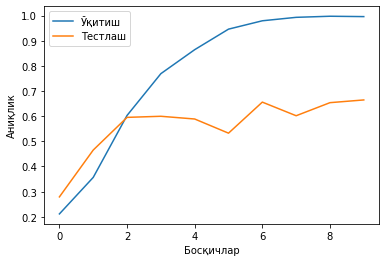

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Босқичлар")
    plt.ylabel("Аниқлик")
    plt.legend(['Ўқитиш', 'Тестлаш'])
    plt.show()


plot_graphs(history, "accuracy")

In [12]:
import numpy as np

txt = ["Футбол бўйича Европа мамлакатлари терма жамоалари ўртасида Миллатлар лигаси мусобақасининг сўнгги 6-тури ўз якунига етди."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = list(uza_train.target_names)
print(uza_train.target_names)
print(np.argmax(pred))
print(pred, labels[np.argmax(pred)])


['business', 'culture', 'documents', 'politics', 'science', 'society', 'sport', 'technology', 'tourism', 'world']
6
[[2.0598918e-03 3.3596677e-03 1.7872309e-05 2.6454299e-07 1.2212238e-04
  3.5681252e-05 9.9187320e-01 2.3704891e-03 1.5929826e-04 1.5057781e-06]] sport
